In [744]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.dummy import DummyClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.random import set_seed

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

from skopt.space import Integer, Real, Categorical
from skopt import BayesSearchCV
from scipy.stats import uniform, loguniform, randint

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
char_df = pd.read_csv('../data/csv/ShakespeareCharacterLines_character_corpus.csv', index_col = ['play', 'name'])

In [3]:
type_df = pd.read_csv('../data/csv/ShakespeareCharacterLines_play_corpus.csv', index_col = ['play'])

In [4]:
colon = slice(None)

- tragedy/comedy column for predictions, MNB, look for other things that work well on language data.

In [795]:
char_xlist = char_df.columns.tolist()
char_xlist.remove('character_dies')

char_X = char_df[char_xlist]
char_y = char_df['character_dies']

smt_sc = SMOTE(random_state = 42, k_neighbors = 25, n_jobs = -1)
char_Xsm, char_ysm = smt.fit_resample(char_X, char_y)

char_X_train, char_X_test, char_y_train, char_y_test = \
train_test_split(char_X, char_y, random_state = 42, stratify = char_y, test_size = .2)

char_Xsm_train, char_Xsm_test, char_ysm_train, char_ysm_test = \
train_test_split(char_Xsm, char_ysm, random_state = 42, stratify = char_ysm, test_size = .2)

sc = StandardScaler()

char_Xs_train = sc.fit_transform(char_X_train)
char_Xs_test = sc.transform(char_X_test)
char_Xs = sc.transform(char_X)

char_Xsms_train = sc.fit_transform(char_Xsm_train)
char_Xsms_test = sc.transform(char_Xsm_test)
char_Xsms = sc.transform(char_Xsm)

In [6]:
type_xlist = type_df.columns.tolist()
type_xlist.remove('play_type')

type_X = type_df[type_xlist]

type_y = type_df['play_type']

type_X_train, type_X_test, type_y_train, type_y_test = train_test_split(type_X, type_y, random_state = 42, stratify = type_y)

sc = StandardScaler()

type_Xs_train = sc.fit_transform(type_X_train)
type_Xs_test = sc.transform(type_X_test)
type_Xs = sc.transform(type_X)

- Move PCA here with images.

In [796]:
pca = PCA(random_state=42)
char_Z_train = pca.fit_transform(char_Xs_train)

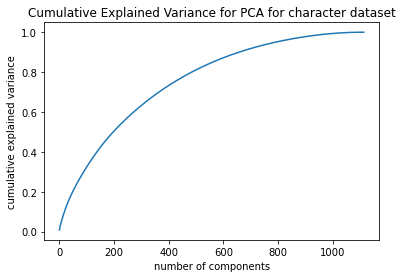

In [797]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance for PCA for character dataset')
plt.show()

In [798]:
char_pca = PCA(random_state=42, svd_solver='full')
char_Z_train = char_pca.fit_transform(char_Xs_train)
char_Z_test = char_pca.transform(char_Xs_test)
char_Z = char_pca.transform(char_Xs)

- PCA on SMOTE

In [800]:
pca_sm = PCA(random_state=42)
char_Zsms_train = pca_sm.fit_transform(char_Xsms_train)

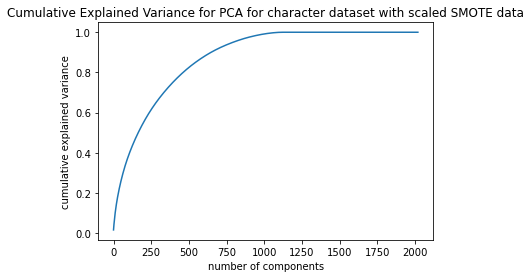

In [801]:
explained_variance = pca_sm.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance for PCA for character dataset with scaled SMOTE data')
plt.show()

In [802]:
pca_sm = PCA(random_state=42, n_components=1114)
char_Zsms_train = char_pca.fit_transform(char_Xsms_train)
char_Zsms_test = char_pca.transform(char_Xsms_test)

- Boosted naive bayes

In [115]:
nb = GaussianNB()
char_bnb_pipe = AdaBoostClassifier(base_estimator=nb, random_state = 42)

char_bnb_params = {
    'n_estimators': randint(40, 60),
    'learning_rate': loguniform(.001, 10),
}

char_bnb_rs = RandomizedSearchCV(estimator = char_bnb_pipe,
                     param_distributions = char_bnb_params,
                     scoring = 'roc_auc',
                     n_iter = 10,
                     n_jobs = 8,
                     cv = 5,
                     refit = True,
                     random_state=42)

In [116]:
char_bnb_rs.fit(char_Xsm_train, char_ysm_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.94203734        nan 0.94253239 0.94203734        nan 0.94153736
        nan 0.94203734        nan 0.94203734 0.93112901 0.94203734
 0.94203734 0.94203734 0.93410669 0.94203734        nan        nan
 0.94203734 0.93112901        nan 0.92964386 0.93906212 0.92964386
 0.93162406 0.94253239 0.94005221 0.94203734 0.94203734 0.92964386
        nan 0.94203734 0.93906212 0.94203734 0.94253239 0.94203734
        nan 0.94302744 0.94203734 0.94203734 0.93360918 0.94203734
 0.94203734 0.93112901 0.93906212 0.93906212        nan        nan
 0.94352495 0.93063396]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=GaussianNB(),
                                                random_state=42),
                   n_iter=50, n_jobs=8,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023430CA9AF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023403A3CA30>},
                   random_state=42, scoring='roc_auc')

In [120]:
train_preds = char_bnb_rs.best_estimator_.predict(char_X_train)
test_preds = char_bnb_rs.best_estimator_.predict(char_X_test)

metrics.roc_auc_score(char_y_train, train_preds), metrics.roc_auc_score(char_y_test, test_preds)

(1.0, 0.43174217087260564)

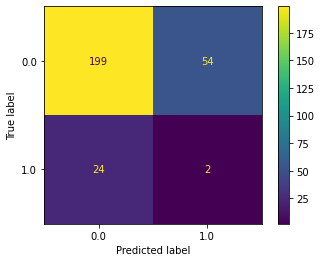

In [126]:
plot_confusion_matrix(char_bnb_rs.best_estimator_, char_X_test, char_y_test)

In [123]:
pickle.dump(char_bnb_rs.best_estimator_, open('../models/CharBoostedNaiveBayes.pkl', 'wb'))

- MNBchar

In [803]:
char_mnb_pipe = MultinomialNB(fit_prior = False)

char_mnb_params = {
    'alpha': uniform(0, 1)
}

char_mnb_rs = RandomizedSearchCV(estimator = char_mnb_pipe,
                     param_distributions = char_mnb_params,
                     scoring = 'roc_auc',
                     n_iter = 50,
                     n_jobs = 8,
                     cv = 5,
                     refit = True,
                     random_state=42)

In [ ]:
char_mnb_rs.fit(char_Xsm_train, char_ysm_train)

In [ ]:
train_preds = char_mnb_rs.best_estimator_.predict(char_X_train)
test_preds = char_mnb_rs.best_estimator_.predict(char_X_test)

metrics.roc_auc_score(char_y_train, train_preds), metrics.roc_auc_score(char_y_test, test_preds)

In [ ]:
plot_confusion_matrix(char_mnb_rs.best_estimator_, char_X_test, char_y_test)

In [ ]:
pickle.dump(char_mnb_rs.best_estimator_, open('../models/CharMultinomialNaiveBayes.pkl', 'wb'))

- Baseline accuracy.

In [14]:
char_df['character_dies'].value_counts(normalize = True)

0.0    0.905958
1.0    0.094042
Name: character_dies, dtype: float64

- Char logreg pipe.

In [128]:
logreg_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('logreg', LogisticRegression(random_state = 42, solver = 'saga'))
])

logreg_params = {
    'logreg__penalty': ['l2', 'elastic-net'],
    'logreg__tol': uniform(0, .1),
    'logreg__C': loguniform(0.0001, 100),
    'logreg__class_weight': Categorical(['balanced', None]),
    'logreg__max_iter': randint(1, 1000),
    'logreg__l1_ratio': uniform(0, 1)
}

logreg_rs_rocauc = RandomizedSearchCV(estimator = logreg_pipe,
                     param_distributions = logreg_params,
                     scoring = 'roc_auc',
                     n_iter = 50,
                     n_jobs = 8,
                     cv = 5,
                     refit = True,
                     random_state=42)

In [139]:
%%time
logreg_rs_rocauc.fit(char_Xsms_train, char_ysms_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.32447531        nan        nan 0.32359495 0.32303971 0.32554215
 0.3218012         nan 0.32362938        nan        nan        nan
        nan 0.32314776 0.32228788        nan        nan 0.32480476
        nan 0.32571921 0.32381129 0.32365389 0.32186031        nan
 0.32315267 0.32320668 0.32349667        nan        nan        nan
        nan        nan        nan        nan 0.32349677 0.32347209
 0.32232224 0.44920267 0.32204208 0.32247958        nan        nan
        nan 0.32247465        nan 0.32204208        nan        nan
 0.3218012         nan]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


Wall time: 20min 21s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('logreg',
                                              LogisticRegression(random_state=42,
                                                                 solver='saga'))]),
                   n_iter=50, n_jobs=8,
                   param_distributions={'logreg__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002343156BEE0>,
                                        'logreg__class_weight': Categorical(categories=('balanced', None), prior=None),
                                        'logreg__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002343156B310>,
                                        'logreg__max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002343156B6A0>,
                                        'logreg__penalty': ['l2',
                                                       

In [200]:
train_preds = logreg_rs_rocauc.best_estimator_['logreg'].predict(char_Xs_train)
test_preds = logreg_rs_rocauc.best_estimator_['logreg'].predict(char_Xs_test)

metrics.roc_auc_score(char_y_train, train_preds), metrics.roc_auc_score(char_y_test, test_preds)

(0.9033696729435085, 0.6666920036485255)

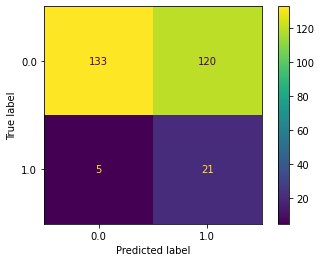

In [141]:
plot_confusion_matrix(logreg_rs_rocauc.best_estimator_['logreg'], char_Xs_test, char_y_test)

In [142]:
pickle.dump(char_mnb_rs.best_estimator_, open('../models/CharLogisticRegression.pkl', 'wb'))

##### - Char NN with PCA.

In [640]:
set_seed(42)
np.random.seed(42)

In [739]:
clear_session()
model = Sequential()

model.add(Dense(35, activation = 'relu', input_shape = (char_Zsms_train.shape[0],), kernel_regularizer = l2(.01)))

layers = 1
for _ in range(0, layers):
    model.add(Dense(35, activation = 'relu', kernel_regularizer = l2(.01)))
    
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 2)

history = model.fit(char_Zsms_train, char_ysms_train, validation_data = (char_Zsms_test, char_y_test), batch_size = 128, 
                   epochs = 100, verbose = 0, callbacks = [early_stop])

In [740]:
train_preds = model.predict(char_Zsms_train)
test_preds = model.predict(char_Zsms_test)

metrics.roc_auc_score(char_ysms_train, train_preds), metrics.roc_auc_score(char_y_test, test_preds)

(1.0, 0.7090301003344481)

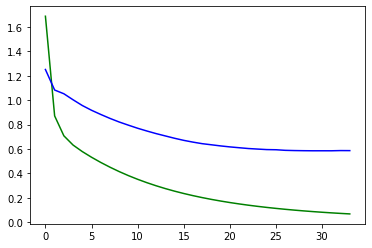

In [741]:
plt.plot(history.epoch, history.history['loss'], c='g');      # green - training loss # Loss
plt.plot(history.epoch, history.history['val_loss'], c='b');  # blue - test loss # Val loss

In [742]:
confusion_matrix(char_y_test, np.rint(model.predict(char_Zsms_test)))

array([[239,  14],
       [ 21,   5]], dtype=int64)

In [743]:
pickle.dump(char_mnb_rs.best_estimator_, open('../models/CharPCANN.pkl', 'wb'))

- SVC

In [771]:
svc_pipe = SVC(random_state = 42, kernel='sigmoid', probability = True,)

svc_params = {
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None],
    'tol': loguniform(0.00001, .1),
    'C': loguniform(0.0001, 100),
    'class_weight': Categorical(['balanced', None]),
    'max_iter': randint(10000, 30000)
}

svc_rs_rocauc = RandomizedSearchCV(estimator = svc_pipe,
                     param_distributions = svc_params,
                     scoring = 'roc_auc',
                     n_iter = 5,
                     n_jobs = 8,
                     cv = 5,
                     refit = True,
                     random_state=42)

In [786]:
%%time
svc_rs_rocauc.fit(char_Zsms_train, char_ysms_train)

Wall time: 2min 40s


RandomizedSearchCV(cv=5,
                   estimator=SVC(kernel='sigmoid', probability=True,
                                 random_state=42),
                   n_iter=5, n_jobs=8,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002341B213BE0>,
                                        'class_weight': Categorical(categories=('balanced', None), prior=None),
                                        'gamma': ['scale', 'auto'],
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023425373190>,
                                        'tol': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023455BBE640>},
                   random_state=42, scoring='roc_auc')

In [787]:
svc_rs_rocauc.best_estimator_

SVC(C=0.4676478725076043, class_weight='balanced', kernel='sigmoid',
    max_iter=18666, probability=True, random_state=42,
    tol=0.0028016351587162583)

In [793]:
train_preds = svc_rs_rocauc.best_estimator_.predict(char_Zsms_train)
test_preds = svc_rs_rocauc.best_estimator_.predict(char_Z_test)

metrics.roc_auc_score(char_ysms_train, train_preds), metrics.roc_auc_score(char_y_test, test_preds)

ValueError: X.shape[1] = 1114 should be equal to 2018, the number of features at training time

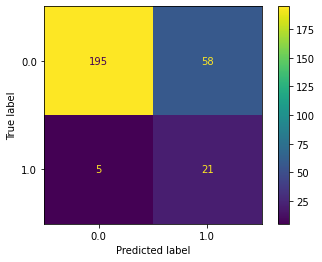

In [785]:
plot_confusion_matrix(svc_rs_rocauc.best_estimator_, char_Z_test, char_y_test)

- char_df predictions block

In [ ]:
char_pred_df = pd.DataFrame(index = char_df.index)

In [ ]:
char_pred_df['prob'] = [val[1] for val in char_mnb_rs.best_estimator_.predict_proba(char_X)]

In [ ]:
char_pred_df['pred'] = char_pred_df['prob'].map(lambda x: 1 if x >= .5 else 0)

In [ ]:
for play, name in index_without_number:
    char_pred_df.loc[(play, name), 'character_dies'] = char_df.loc[(play, name), 'character_dies']

In [ ]:
char_pred_df.sort_values(by = 'prob', inplace = True)

In [ ]:
plot_confusion_matrix(char_mnb_rs.best_estimator_, char_X, char_y)

In [ ]:
char_pred_df.loc[('titus-andronicus', colon), :]